### 1. Importing Visulization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensures the charts are displayed in the notebook

%matplotlib inline

In [3]:
# Define path

path = r'/Users/lucerovargas/Documents/Data Analysis/Data Immersion/Achievement 6- Sourcing Open Data'

In [4]:
# Import cleaned data set

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Data_clean.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_characteristics,location_description,n_guns_involved,notes,participant_age,participant_gender,participant_relationship,participant_status,participant_type,sources
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,NaN,NaN,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...


In [6]:
# Remove extra column "Unnamed: 0"

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.shape

(239677, 19)

### 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis

Questions 

• Is there a certain season where there is in increase in gun violence incidents?

• Do certain states have higher gun violence incidents, if so, why? What is their stand
in rights to bear arms?

• For suspects are females/males have the same percentage? Or is one gender higher
than the other?

In [8]:
# Create subset with variables needed to answer questions

hm = df[['incident_id', 'n_killed', 'n_injured', 'n_guns_involved', 'participant_age']]

### 3. Create a correlatioin matrix heatmap

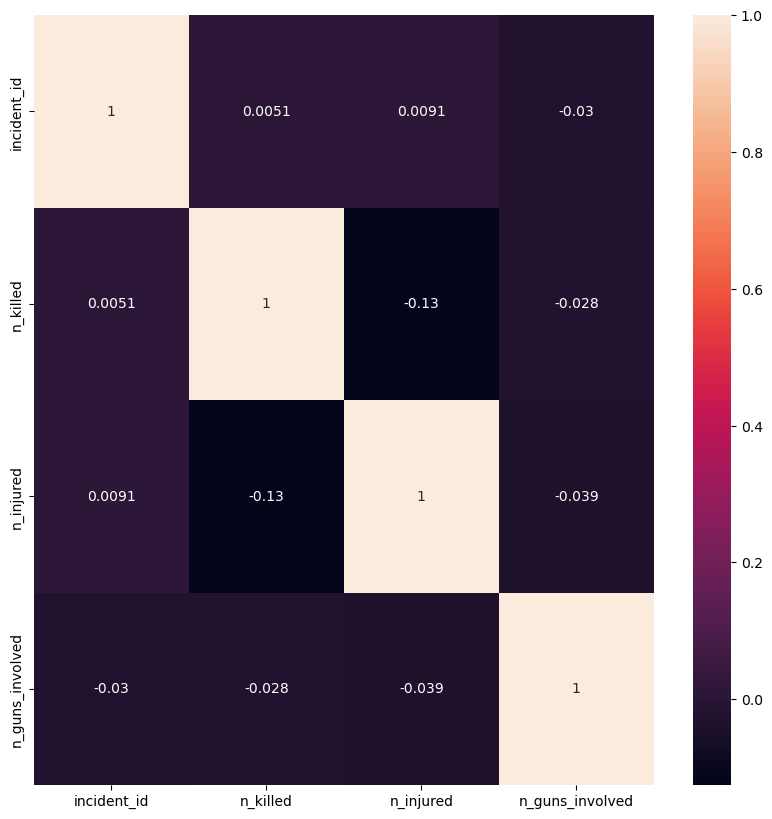

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined
heatmap = sns.heatmap(hm.corr(), annot = True, ax = ax)

All the coefficients have a negative relationship between the varables. This leads me to believe there is no correlations between the variables.

### 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships

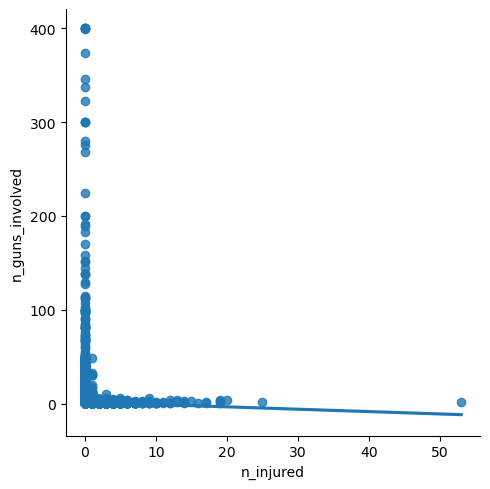

In [10]:
# Create scatterplot between n_injured and n_guns_involved

sns.lmplot(x = 'n_injured', y = 'n_guns_involved', data = df)

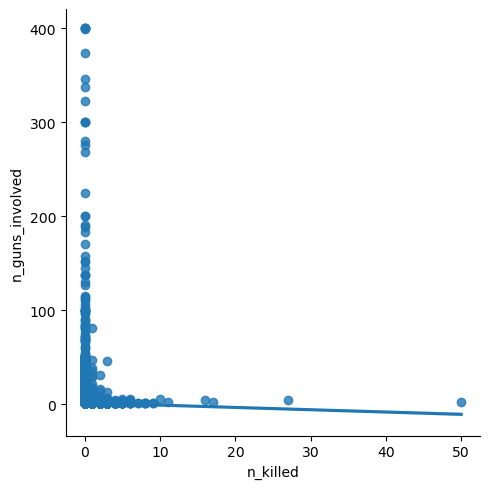

In [11]:
# Create a scatterplot between n_killed and n_guns_involved

sns.lmplot(x = 'n_killed', y = 'n_guns_involved', data = df)

The relationships are weaked, the number of guns involved does not have a linear trend with the number of killed or number of injured

### 5. Create a pair plot of the entire data set

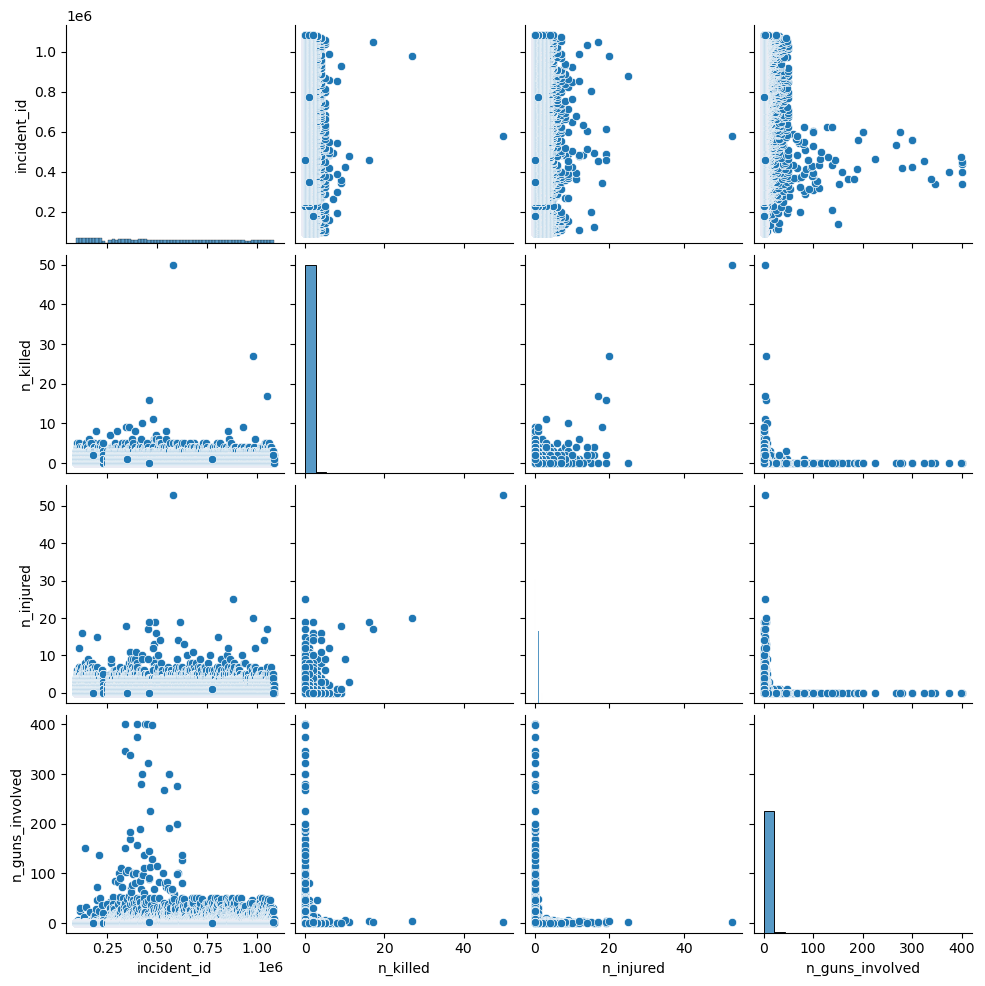

In [12]:
pp = sns.pairplot(df)

The data does not show a correlation between the number of guns involved and the number of injured/deaths

### 6. Create a categorical plot and interpret the results

<AxesSubplot:xlabel='n_killed', ylabel='Count'>

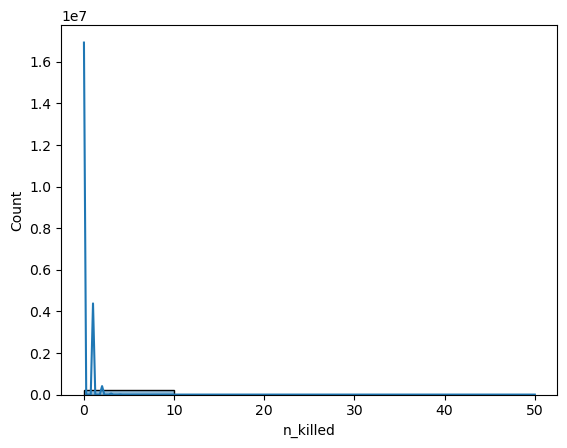

In [13]:
# Review histogram

sns.histplot(df['n_killed'], bins = 5, kde = True)

In [14]:
df['n_killed'].value_counts(dropna = False)

0     185835
1      48436
2       4604
3        595
4        139
5         41
6         11
8          5
9          3
7          2
11         1
10         1
16         1
50         1
27         1
17         1
Name: n_killed, dtype: int64

In [15]:
df.loc[df['n_killed'] < 4, 'killed category'] = 'Low'

In [16]:
df.loc[(df['n_killed'] >= 4) & (df['n_killed'] < 8), 'killed category'] = 'Medium'

In [17]:
df.loc[df['n_killed'] >= 8, 'killed category'] = 'High'

In [18]:
df['killed category'].value_counts(dropna = False)

Low       239470
Medium       193
High          14
Name: killed category, dtype: int64

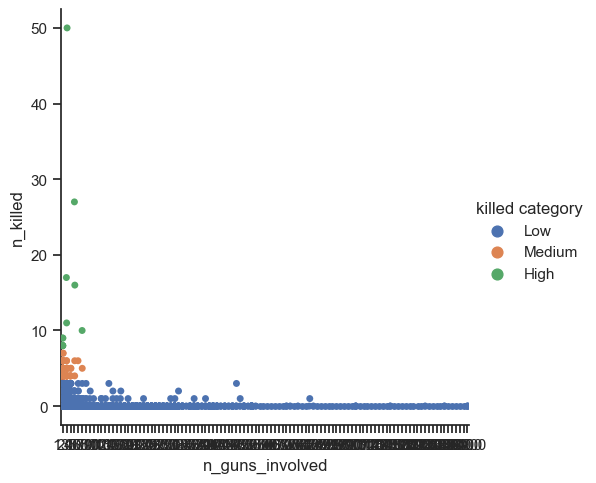

In [19]:
# Create a categorical plot

sns.set(style="ticks")
cp = sns.catplot(x="n_guns_involved", y="n_killed", hue="killed category", data=df)

In interpreting the categorical plot the number of guns involved does not determine a factor on the number of killed, an interesting fact is that there is a high number of deaths involved with a low number of guns involved

Questions 

• Is there a certain season where there is an increase in gun violence incidents?
    
    Did not determine as the date column was not available for interpretation, will run script and visualization through excel instead

• Do certain states have higher gun violence incidents, if so, why? What is their stand
in rights to bear arms?
       
       Did not determine, will review in excel

• For suspects are females/males have the same percentage? Or is one gender higher
than the other?
    
    Did not determine, will review in excel